### Распределение Парето
https://ru.wikipedia.org/wiki/Распределение_Парето

Распределение случайной величины X задается равенством:
$$F_X(x) = P(X<x) = 1-(\frac{x_m}{x})^k$$

Примем следующие исходные параметры: 
$$x_m = 1$$
$$k = 3$$

Функция распределения:
$$F(x) = 1-\frac{1}{x^3}$$

Плотность вероятности:
$$f(x) = \frac{3}{x^4}$$

Математическое ожидание:
$$\frac{k*x_m}{k-1} = 1.5$$

Дисперсия:
$$(\frac{x_m}{k-1})^2*\frac{k}{k-2} = 0.75$$


Стандартное отклонение:
$$\sqrt{0.75} = 0.866$$

In [5]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#cоздаем распределение Парето с параметрами k=3 и xm=1
k = 3
xm = 1
pareto = st.pareto(k, loc=0, scale=xm)

In [7]:
#генерируем 1000 случайных чисел из распределения Парето
arr = pareto.rvs(1000)

In [8]:
#задаем пространство для отображения
x = np.linspace(st.pareto.ppf(0.01, k), st.pareto.ppf(0.99, k), 100)

In [9]:
#вычисляем теоретическую плотность распределения Парето
pareto_pdf = pareto.pdf(x)

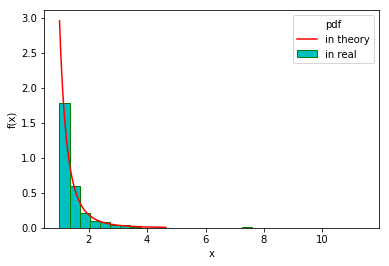

In [28]:
#рисуем гистограмму реальной выборки и накладываем на нее теоретическую плотность распределения Парето
plt.plot(x, pareto_pdf, color='r', label='in theory')
plt.hist(arr, bins = 30, normed = True, color = 'c', label = 'in real', edgecolor = 'g')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend(title = 'pdf')

Создаем функцию, которая возвращает массив, состоящий из 1000 элементов. 
Каждый из этих элементов - это выборочное матожидание нашей случайной величины с параметром n

In [35]:
def get_arr(n):
    return np.array([np.mean(pareto.rvs(n)) for i in range(1000)])

Создаем процедуру, на вход которой будем подавать параметр n, а в ответ получать гистограмму распределения выборочных матожиданий с наложенным на нее нормальным распределением

In [60]:
def plotting(n):
    #получаем массив выборочных матожиданий
    means = get_arr(n)
    
    #по информации из wiki и используя ЦПТ рассчитываем теоретические матожидание и стандартное отклонение
    teor_mo = 1.5
    teor_std = 0.866/n**0.5
    #вычисляем нормальное распределение с использованием теоретических матожидания и стандартного отклонения
    norm_rv = st.norm(teor_mo,teor_std)
    
    #рисуем гистограмму и накладываем на нее посчитанное нормальное распределение
    plt.hist(means, bins=20, normed=True, label = 'Pareto', color='c', edgecolor='g')
    x = np.linspace(0.5,2.5,100)            
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Norm', color='r')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend()
    plt.title('n=' + str(n))
    
    #для большей наглядности отображаем теоретическое и измеренное значения матожидания и стандартного отклонения
    #сравнивая эти цифры, можно оценить точность аппроксимации с увеличением параметра n
    print('теоретическое матожидание = '+str(teor_mo))
    print('измеренное матожидание = '+str(means.mean()))
    print('')
    print('теоретическое стандартное отклонение = '+str(teor_std))
    print('измеренное стандартное отклонение = '+str(means.std()))

0.387286973703
0.387286973703
теоретическое матожидание = 1.5
измеренное матожидание = 1.49739328068

теоретическое стандартное отклонение = 0.387286973703
измеренное стандартное отклонение = 0.363001009701


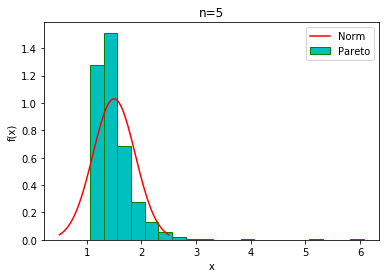

In [61]:
#вызываем процедуру для проверки ЦПТ при n=5
plotting(5)

0.1732
0.1732
теоретическое матожидание = 1.5
измеренное матожидание = 1.51073830374

теоретическое стандартное отклонение = 0.1732
измеренное стандартное отклонение = 0.180508944986


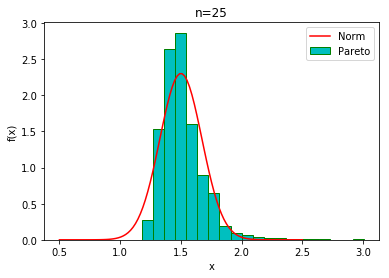

In [62]:
#вызываем процедуру для проверки ЦПТ при n=25
plotting(25)

0.0866
0.0866
теоретическое матожидание = 1.5
измеренное матожидание = 1.4981551324

теоретическое стандартное отклонение = 0.0866
измеренное стандартное отклонение = 0.0847843436439


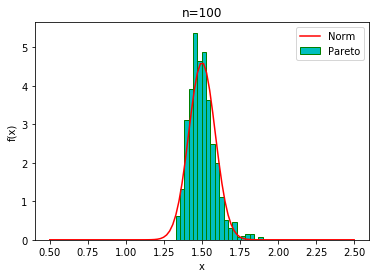

In [63]:
#вызываем процедуру для проверки ЦПТ при n=100
plotting(100)

0.0387286973703
0.0387286973703
теоретическое матожидание = 1.5
измеренное матожидание = 1.49943577735

теоретическое стандартное отклонение = 0.0387286973703
измеренное стандартное отклонение = 0.0379136948461


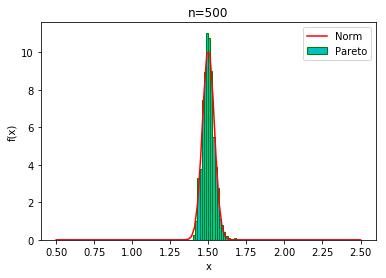

In [64]:
#вызываем процедуру для проверки ЦПТ при n=500
plotting(500)

## Выводы:
1. Наглядно продемонстрировано, что ЦПТ работает
2. При увеличении "n" точность аппроксимации распределения выборочных средних нормальным распределением ВОЗРАСТАЕТ
(измеренные значения матожидания и стандартного отклонения стремятся к теоретическим значениям)